<ipython-input-93-0d0af8e8bd3d>:91: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "compression" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('output.tif', bbox_inches='tight', pad_inches=0, transparent=False, dpi=300, compression=None)


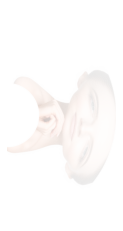

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import map_coordinates


# Load the image
image = plt.imread('face.jpg')

center_y_offset = 100 # 原影像的polar coordinate 中心y



# Get image dimensions
ny, nx = image.shape[:2]

# Define center
cx, cy = nx/2, ny + center_y_offset

# Create meshgrid of coordinates
x = np.linspace(0, nx-1, nx)
y = np.linspace(0, ny-1, ny)
xx, yy = np.meshgrid(x, y)

# Calculate polar coordinates
r = np.sqrt((xx - cx)**2 + (yy - cy)**2)
theta = np.arctan2(yy - cy, xx - cx)

r0 = 300 #新影像的圓柱半徑
r1 = ny*2 #新影像的高度

# Adjust the radius r to create a new transformation
newR = r0 + (ny - yy) / ny * r1  # 適用於每個點

# Define newTheta and r1 for mapping
newTheta = np.tile(np.linspace(-np.pi/2, np.pi/2, nx), (ny, 1))


# Map polar coordinates back to Cartesian for interpolation
xx_polar = newR * np.cos(newTheta) 

yy_polar = newR * np.sin(newTheta)

xx_polar = xx_polar
yy_polar = -np.min(yy_polar) + yy_polar

#plt.scatter(np.arange(nx), xx_polar[100], s=0.01)  # `s=1` to set the marker size


# Determine the size of the new image based on the transformed coordinates
min_x, max_x = np.min(xx_polar), np.max(xx_polar)
min_y, max_y = np.min(yy_polar), np.max(yy_polar)




# Calculate the size of the new image
new_width = int(np.ceil(max_x - min_x))
new_height = int(np.ceil(max_y - min_y))

# Initialize the new image with the calculated size
newImage = np.full((new_height, new_width, image.shape[2]), 255, dtype=image.dtype)


# Adjust the polar coordinates to the new image's coordinate system
xx_polar_int = np.round(xx_polar - min_x).astype(int)
yy_polar_int = np.round(yy_polar - min_y).astype(int)



# Vectorized operation to populate the new image
valid_indices = (xx_polar_int >= 0) & (xx_polar_int < new_width) & (yy_polar_int >= 0) & (yy_polar_int < new_height)
newImage[yy_polar_int[valid_indices], xx_polar_int[valid_indices]] = image[valid_indices]


'''
# Populate the new image with pixel values from the original image
for i in range(ny):
    for j in range(nx):
        for k in range(image.shape[2]):
            x = xx_polar_int[i][j]
            y = yy_polar_int[i][j]
            if 0 <= x < new_width and 0 <= y < new_height:  # Ensure indices are within bounds
                newImage[y][x][k] = image[i][j][k]  # Note: y and x are flipped for row, column indexing
'''


# Display the transformed image
plt.imshow(newImage)
plt.axis('off')  # Hide the axis
#plt.savefig('output.png', dpi=150, bbox_inches='tight', pad_inches=0, transparent=False)
plt.savefig('output.tif', bbox_inches='tight', pad_inches=0, transparent=False, dpi=300, compression=None)

plt.show()




In [131]:
import cv2
import numpy as np

# 讀取輸入圖像
image = cv2.imread('face.jpg')

# 圖像的尺寸
height, width = image.shape[:2]

# 設置scale變換參數
scale_x = 2
scale_y = 2

new_width = int(width * scale_x)
new_height = int(height *scale_y)

# 創建新的映射矩陣
map_x, map_y = np.meshgrid(np.arange(new_width), np.arange(new_height))

# 計算反向映射矩陣，將新圖像中的每個點映射回原圖像
map_x_new = map_x / scale_x
map_y_new = map_y / scale_y


# 使用 cv2.remap 進行剪切變換
map_x_new = np.clip(map_x_new, 0, width - 1).astype(np.float32)
map_y_new = np.clip(map_y_new, 0, height - 1).astype(np.float32)
scale_image = cv2.remap(image, map_x_new, map_y_new, interpolation=cv2.INTER_LINEAR, borderValue=(255, 255, 255))


# 保存輸出圖像
cv2.imwrite('output.jpg', scale_image)


True

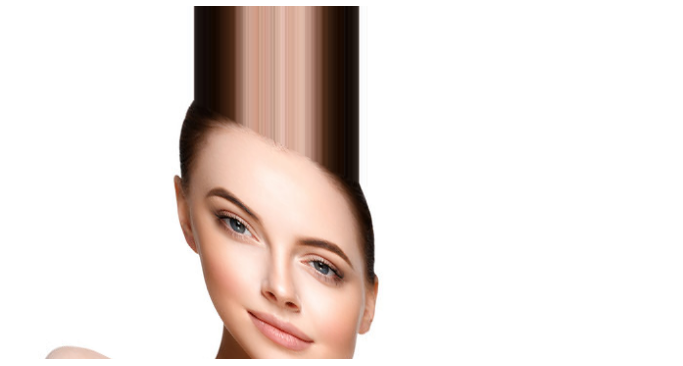

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import map_coordinates

# Load the image
image = plt.imread('face.jpg')

# Get image dimensions
height, width = image.shape[:2]

# Set shear transformation parameters
shear_x = -0.5  # horizontal shear factor
shear_y = 0     # vertical shear factor

# Calculate new dimensions
new_width = int(width + abs(shear_x) * height)
new_height = int(height + abs(shear_y) * width)

# Create meshgrid for the new image
y_new, x_new = np.meshgrid(np.arange(new_height), np.arange(new_width), indexing='ij')

# Calculate inverse mapping
x_orig = x_new + shear_y * y_new
y_orig = y_new + shear_x * x_new

# Clip coordinates to ensure they're within the original image bounds
x_orig = np.clip(x_orig, 0, width - 1)
y_orig = np.clip(y_orig, 0, height - 1)

# Use map_coordinates for interpolation
sheared_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype)
for i in range(image.shape[2]):
    sheared_image[:,:,i] = map_coordinates(image[:,:,i], [y_orig, x_orig], order=1, mode='constant', cval=255)

# Display the transformed image
plt.figure(figsize=(12, 8))
plt.imshow(sheared_image)
plt.axis('off')  # Hide the axis
plt.savefig('output.png', dpi=150, bbox_inches='tight', pad_inches=0, transparent=False)
plt.show()

In [ ]:

###########################

# 設置旋轉角度和中心點（可調整）
angle = 45  # 旋轉角度
center_x = new_width // 2  # 旋轉中心點 x 坐標
center_y = new_height // 2  # 旋轉中心點 y 坐標

# 計算旋轉矩陣
rotation_matrix = cv2.getRotationMatrix2D((center_x, center_y), angle, 1.0)

# 計算旋轉後的圖像邊界
cos = np.abs(rotation_matrix[0, 0])
sin = np.abs(rotation_matrix[0, 1])
rotated_width = int((new_height * sin) + (new_width * cos))
rotated_height = int((new_height * cos) + (new_width * sin))

# 調整旋轉矩陣以考慮圖像中心的移動
rotation_matrix[0, 2] += (rotated_width / 2) - center_x
rotation_matrix[1, 2] += (rotated_height / 2) - center_y

# 使用 cv2.warpAffine 進行旋轉
rotated_image = cv2.warpAffine(sheared_image, rotation_matrix, (rotated_width, rotated_height), borderValue=(255, 255, 255))

# 保存輸出的圖像
#cv2.imwrite('output.jpg', rotated_image)
